# Character Segmentation
****

## Importing Dependencies

In [47]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from skimage.filters import sobel
from skimage.segmentation import watershed

## Load Handwritten Document Image

In [46]:
img = cv2.imread('dataset/download.jpg', cv2.IMREAD_UNCHANGED)
img_copy = img.copy()

## Preprocessing Functions

In [48]:
# SHARPEN
def sharpen(img):
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 10, -1],
                               [-1, -1, -1]])
    sharpen = cv2.filter2D(img, -1, sharpen_kernel)
    return sharpen

In [18]:
gray = cv2.cvtColor(sharpen(img), cv2.COLOR_BGR2GRAY)

In [51]:
# BLUR
def blur(img, blur_radius):
    blur = cv2.GaussianBlur(img, (7, 7), blur_radius)
    plt.figure(figsize=(20,20))
    plt.imshow(blur, cmap='gray')
    return blur

In [52]:
_, threshold = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'threshold'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [39]:
def segmentation(threshold):
    elevation_map = sobel(threshold)
    markers = np.zeros_like(threshold)
    markers[threshold < 30] = 1
    markers[threshold > 150] = 2
    segmentation_ = watershed(elevation_map, markers)
    segmentation_noramlized = cv2.normalize(src = segmentation_, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return elevation_map, segmentation_, segmentation_noramlized

elevation_map, segmentation_, segmentation_noramlized = segmentation(threshold)

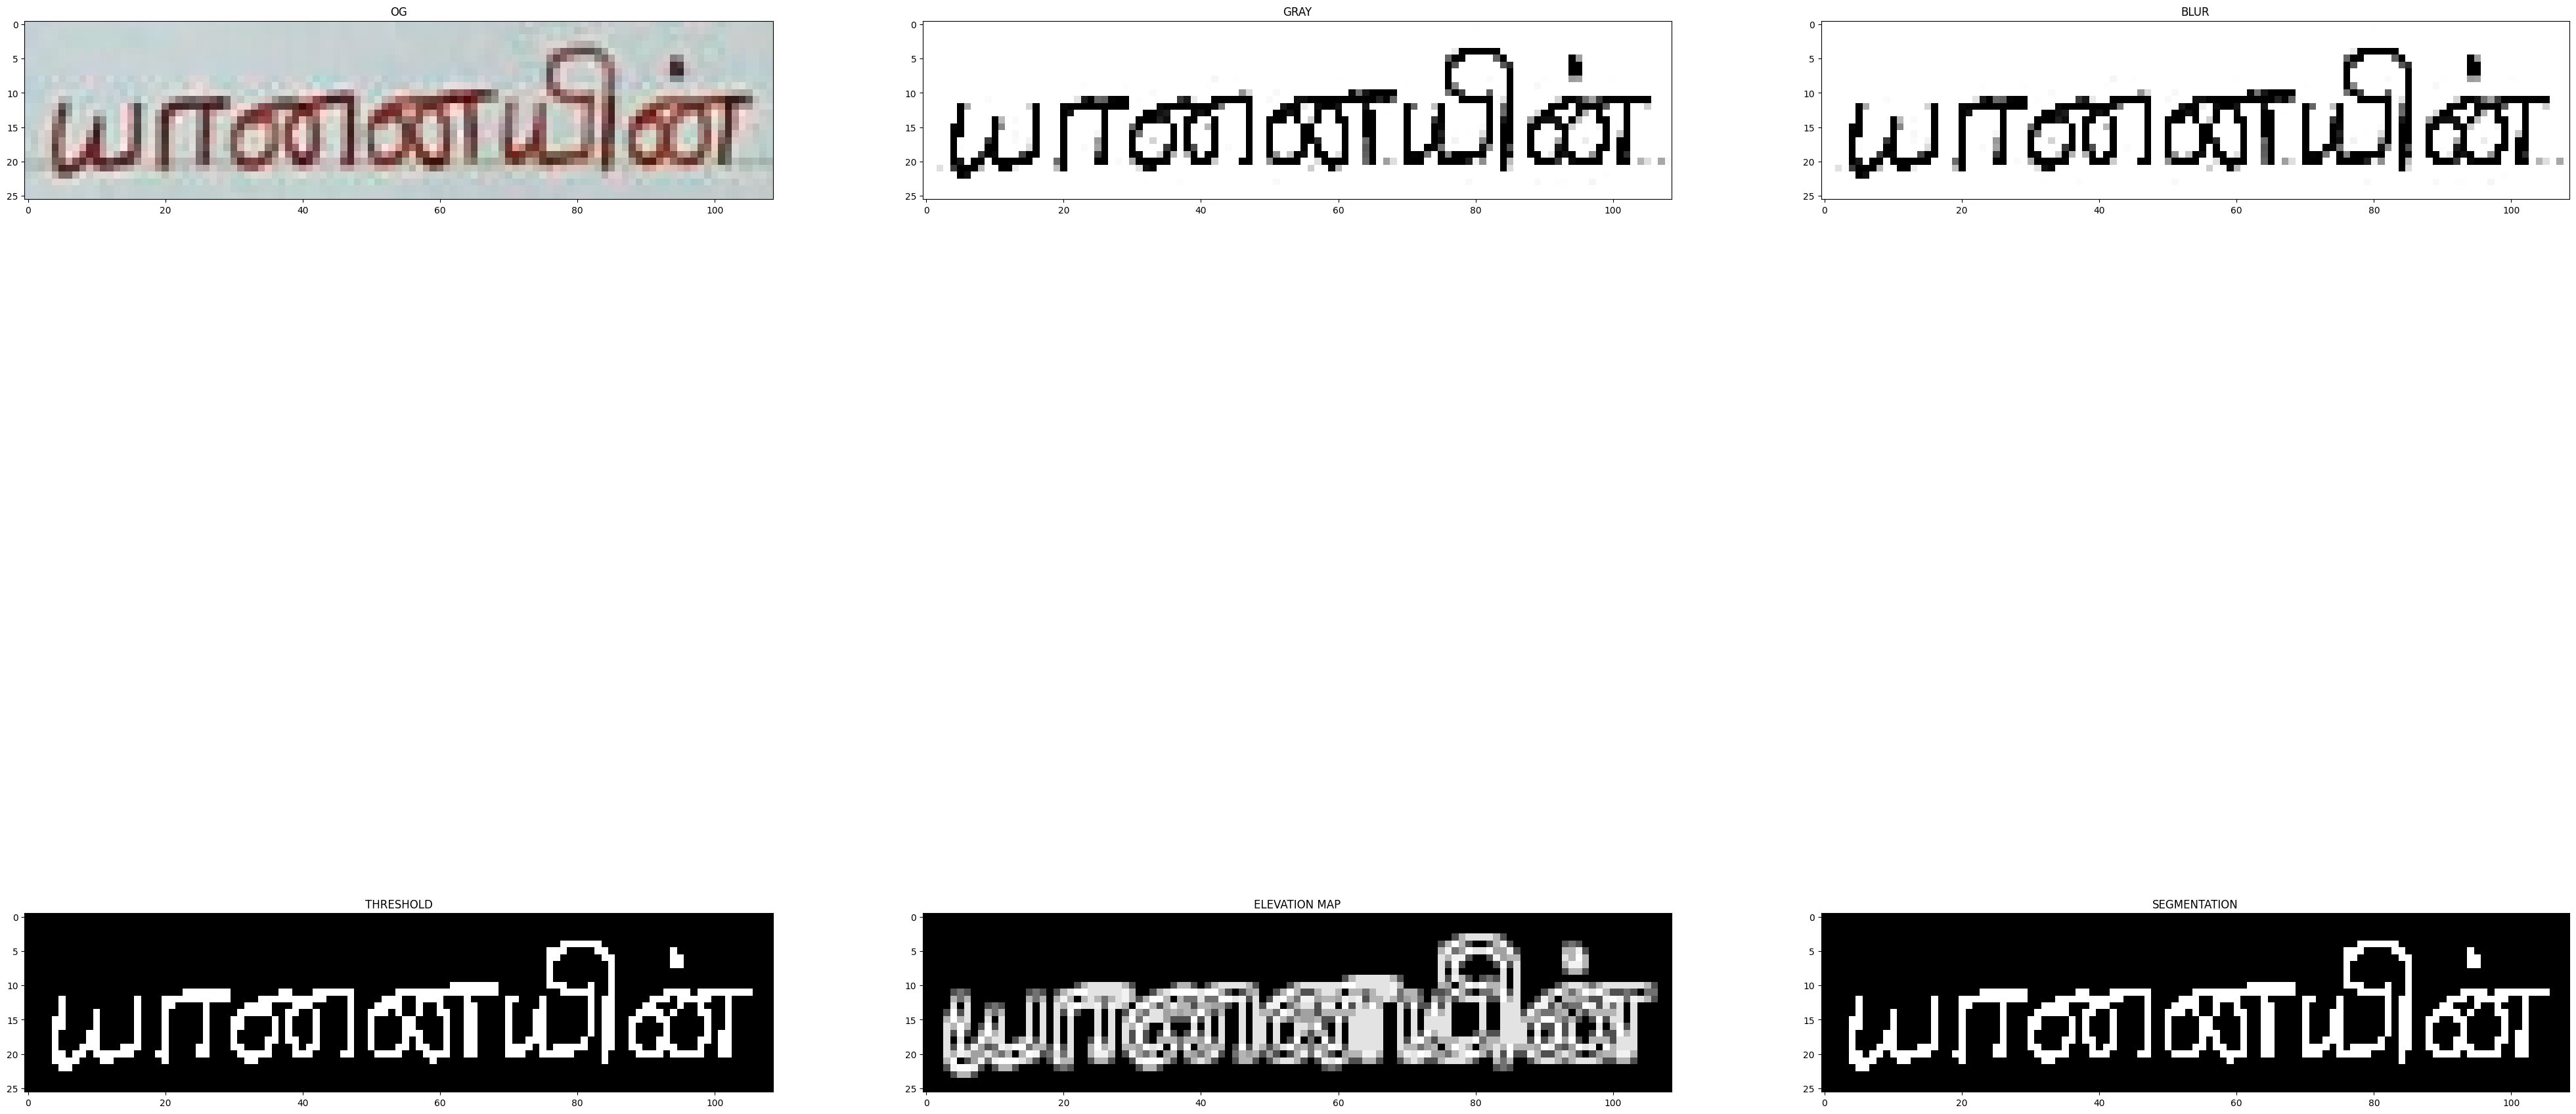

In [40]:
titles = ['OG', 'GRAY', 'BLUR', 'THRESHOLD', 'ELEVATION MAP', 'SEGMENTATION']
images = [img, gray, blur, threshold, elevation_map, segmentation_]

plt.figure(figsize=(50,50))
for i in np.arange(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
plt.show()

In [41]:
def contour(segmentation_noramlized):
    contours, hierearchy = cv2.findContours(segmentation_noramlized, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    contours_poly = [None] * len(contours)
    boundRect = []
    for i, c in enumerate(contours):
        if hierearchy[0][i][3] == -1:
            contours_poly[i] = cv2.approxPolyDP(c, 5, True)
            boundRect.append(cv2.boundingRect(contours_poly[i]))
    return boundRect

boundRect = contour(segmentation_noramlized)

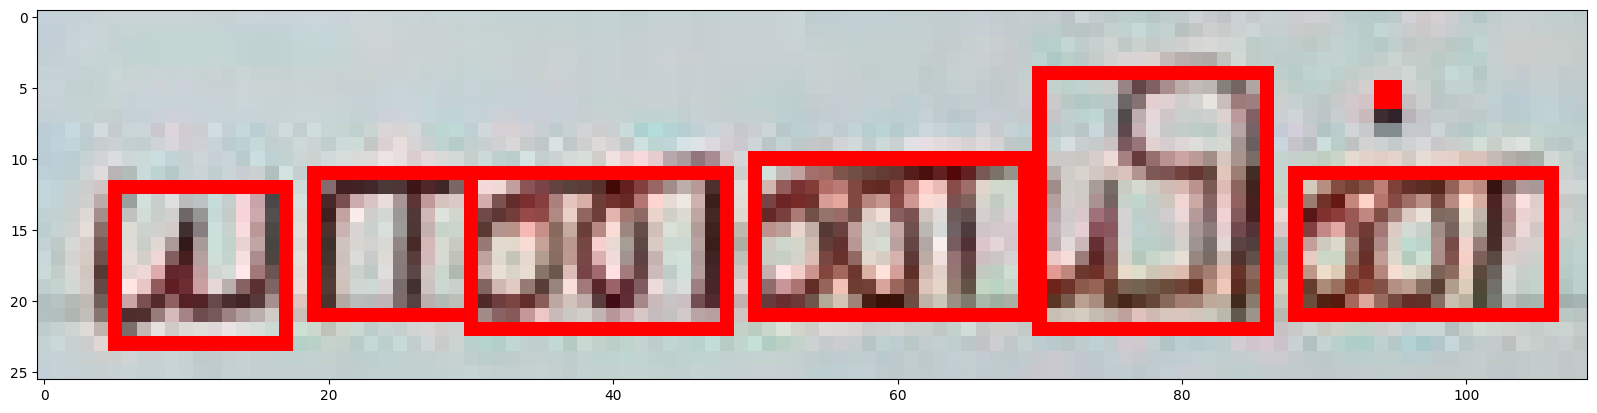

In [42]:
def bounding(img, boundingRect: list):
    img_copy = img.copy()
    for i in range(len(boundRect)):
        color = (255, 0, 0)
        cv2.rectangle(img_copy, (int(boundRect[i][0]), int(boundRect[i][1])),
                     (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] +boundRect[i][3])),
                     color, 1)
    return img_copy

img_copy = bounding(img, boundRect)
plt.figure(figsize=(20, 20))
plt.imshow(img_copy)

In [58]:
print(boundRect)

max=0
for i in range(len(boundRect)):
    if max < boundRect[i][3]:
        max = boundRect[i][3]
print(max)

[(5, 12, 12, 11), (88, 11, 18, 10), (30, 11, 18, 11), (19, 11, 11, 10), (50, 10, 19, 11), (94, 5, 1, 1), (70, 4, 16, 18)]
18


In [43]:
def croppedList(boundRect):
    cropped_list = []
    for i in range(len(boundRect)):
        dimension_offset = 5
        position_offset = 2
        x, y, w, h = boundRect[i]
        h = h + dimension_offset
        w = w + dimension_offset
        x = x - position_offset
        y = y - position_offset
    
        croppedImg = img[y:y+h, x:x+w]
        cropped_list.append(croppedImg)
   
    return cropped_list

cropped_list = croppedList(boundRect)

IndexError: list index out of range

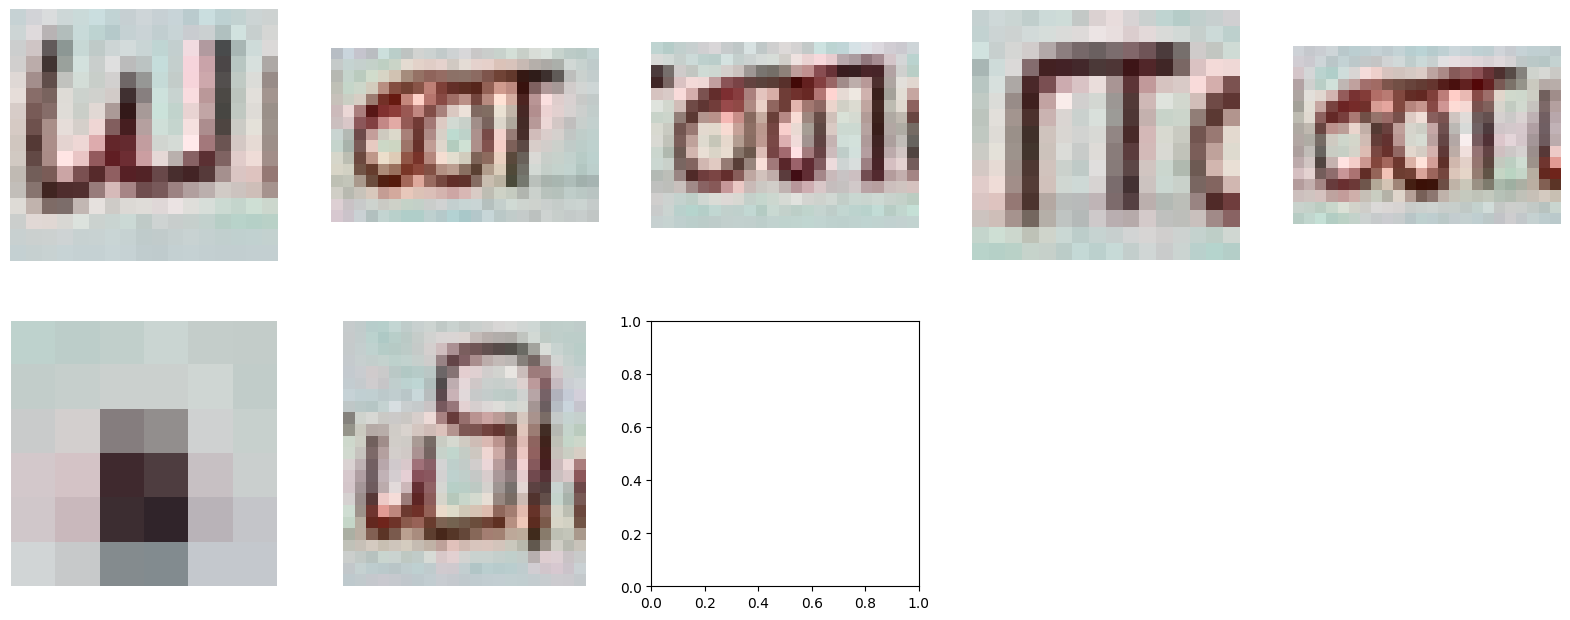

In [44]:
plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(cropped_list[i], 'gray')
    plt.axis('off')

In [45]:
img = cropped_list[20]

plt.imshow(img)

IndexError: list index out of range